compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller than the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

C:\Users\Elena\AppData\Local\Temp\ipykernel_12640\3494681623.py:44: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())
C:\Users\Elena\AppData\Local\Temp\ipykernel_12640\3494681623.py:48: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True)


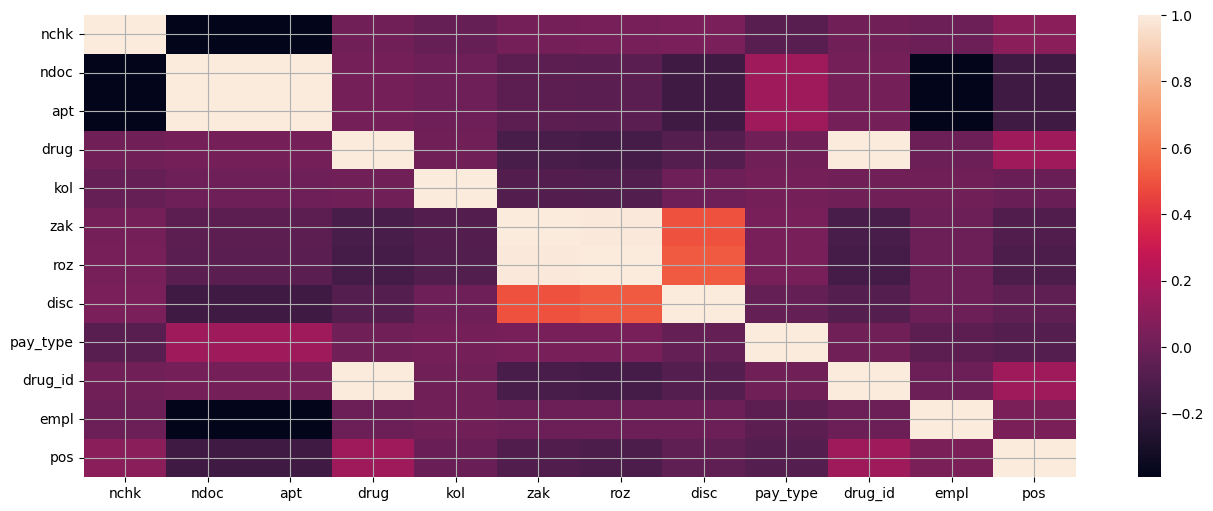

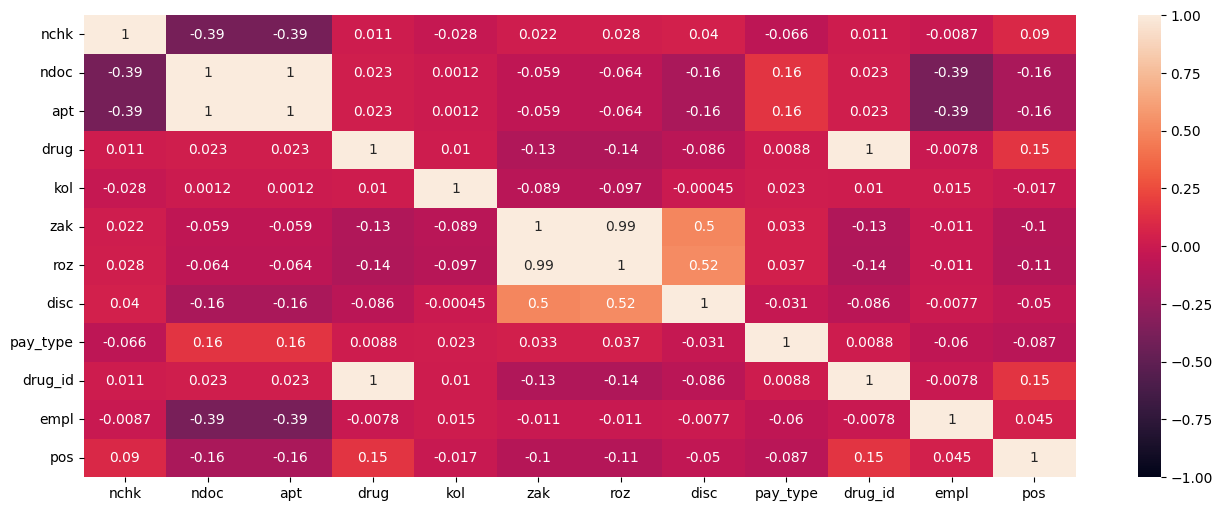

In [26]:
import pandas as pd
df = pd.read_csv('data.csv',encoding='1251')
df.tail(3)
pd.describe_option()
pd.set_option('display.max_info_columns' , 40)
pd.set_option('display.float_format','{:.2f}'.format)
columns = ['DR_Dat','DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt','DR_CDrugs','DR_Kol','DR_CZak', 'DR_CRoz','DR_SDisc', 'DR_TPay','DR_CDrugs', 'DR_Suppl','DR_CDisc','DR_BCDisc',
         'DR_TabEmpl','DR_VZak', 'DR_Pos']
df = df[columns]
df.columns=['dt','c_time', 'nchk', 'ndoc', 'apt','drug','kol','zak', 'roz','disc', 'pay_type','drug_id', 'suppl','disc_id','disc_barcode',
         'empl','vzak', 'pos']
#меняем тип данных столбца
df['disc_barcode'] = df['disc_barcode'].astype('str').replace('\.0', '' , regex=True)
#выводим типы данных df.dtypes
df['disc_id'] = df['disc_id'].astype('str').replace('\.0', '' , regex=True)
#приведение к формату date //df['dt'] = pd.to_datetime(df['dt']).dt.day_of_year(сколько дней )
df['dt'] = pd.to_datetime(df['dt']).dt.strftime('%d.%m.%Y')
#возвращает уникальные значения //df['vzak'].unique()
df['vzak'] = df['vzak'].astype('str').replace('1' , 'обычный ').replace('2' , 'интернет')
#оценивает количество пропусков // df.isna().any()//fillna(0)Заменит пустые значения 0 ?//dropna()удалит пустые строки
#dropna(axis=1) удалит столбцы в которых содержаться пустые ячейки
#df.info() покажет весь датафрейм (сколько строк, есть ли пропуски,типы данных)

# ОПИСАТЕЛЬНЫЕ СТАТИСТИКА
#df.describe() покажет количество строк,процентиль,отклонение,макс,мин,медиану(50% процентиль) по всем столбцам
print(df.describe())
#категориальные переменные
print(df['pay_type'].value_counts())
#выводим номер аптеки и количество платежей
print(df.apt.value_counts())
#тоже самое но в процентах
print(df.apt.value_counts(normalize=True))

#распределение количества позиций в чеке
#уникальное количество позиций в чеке
print(df.pos.unique())
print(df.pos.value_counts())
#строим гистограмму
df.pos.hist(bins=24)

#корреляция между переменными
import seaborn as sns
#выводит тепловую карту
sns.heatmap(df.corr())
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True)
plt.rcParams['figure.figsize'] = (16, 10)

In [7]:
df['hour'] = pd.to_datetime(df.c_time).dt.hour
df.hour

0       10
1       10
2       10
3       10
4       10
        ..
4457    21
4458    21
4459    21
4460    21
4461    21
Name: hour, Length: 4462, dtype: int64

In [23]:
gr = df.groupby(['hour'])['kol'].agg(sum)
gr


hour
8     20.10
9    236.50
10   361.65
11   326.55
12   311.59
13   422.80
14   358.30
15   432.97
16   375.88
17   375.45
18   457.50
19   419.29
20   388.57
21    97.71
22     1.00
Name: kol, dtype: float64

In [ ]:
sns.boxplot(gr)

In [29]:
a = df.groupby(['dt', 'nchk'])['kol', 'roz', 'zak'].agg({
    'kol': sum, 
    'roz': ['sum', 'max'],
    'zak': sum
})

C:\Users\Elena\AppData\Local\Temp\ipykernel_12640\4135302964.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df.groupby(['dt', 'nchk'])['kol', 'roz', 'zak'].agg({


In [30]:
a.reset_index()

dt  nchk   kol     roz           zak
                         sum     sum    max    sum
0     11.08.2022  1698  1.00  463.00 463.00 342.30
1     11.08.2022  1699  1.00  720.00 720.00 545.27
2     11.08.2022  1700  1.00   60.00  60.00  36.68
3     11.08.2022  1701  4.00  955.00 443.00 756.12
4     11.08.2022  1702  1.00   94.00  94.00  76.55
...          ...   ...   ...     ...    ...    ...
1936  12.08.2022  8486  1.00  460.00 460.00 302.07
1937  12.08.2022  8487  1.00  476.00 476.00 396.66
1938  12.08.2022  8488  1.00  220.00 220.00 187.84
1939  12.08.2022  8489 18.00 1089.00 180.00 778.61
1940  12.08.2022  8490  3.00  869.00 775.00 626.13

[1941 rows x 6 columns]

In [31]:
b = df.groupby(['dt', 'empl'])['zak', 'roz'].agg(sum)

C:\Users\Elena\AppData\Local\Temp\ipykernel_12640\1379611873.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = df.groupby(['dt', 'empl'])['zak', 'roz'].agg(sum)


In [34]:
b['revenue'] = b['roz'] - b['zak']
b

zak       roz  revenue
dt         empl                            
11.08.2022 25   72004.24  93030.00 21025.76
           30   90350.41 111916.97 21566.56
           36   62425.32  77368.03 14942.71
           47   68458.33  86626.01 18167.68
           50   72304.41  90830.01 18525.60
           53   37727.08  48746.00 11018.92
           54   52880.81  67517.08 14636.27
           123  88926.21 116678.03 27751.82
           205  49904.42  59471.00  9566.58
           605  28699.65  36954.01  8254.36
12.08.2022 37   92688.93 118091.37 25402.44
           48   72773.60  93032.02 20258.42
           54   65852.52  83229.05 17376.53
           110  89126.47 113275.05 24148.58
           123  99298.80 124231.66 24932.86
           205  34772.17  44595.01  9822.84

In [ ]:
df.groupby(['dt', 'empl'])['zak', 'roz', 'kol'].apply(lambda x: sum(x['kol']*(x['roz'] - x['zak'])))

In [35]:
import numpy as np

In [36]:
df.groupby(['dt', 'drug'])['roz', 'kol'].agg({
    'roz': np.mean, 
    'kol': sum
})

C:\Users\Elena\AppData\Local\Temp\ipykernel_12640\1098215732.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['dt', 'drug'])['roz', 'kol'].agg({


roz   kol
dt         drug                 
11.08.2022 3        553.50  2.00
           25       563.00  1.00
           31       455.00  2.00
           35      1196.00  1.00
           46       409.00  1.00
...                    ...   ...
12.08.2022 616236  1113.00  1.00
           628983   332.00  1.00
           1504015    2.00 65.00
           1504330   25.00  1.00
           1504331    0.01 16.00

[2304 rows x 2 columns]

In [41]:
df['rroz'] = df.roz.apply(lambda x: round(x, -2))
a = df.groupby(['dt', 'rroz'])['kol'].agg(sum).reset_index()
a = a[a.loc[:, 'rroz'] < 2000]

<Axes: xlabel='rroz', ylabel='kol'>

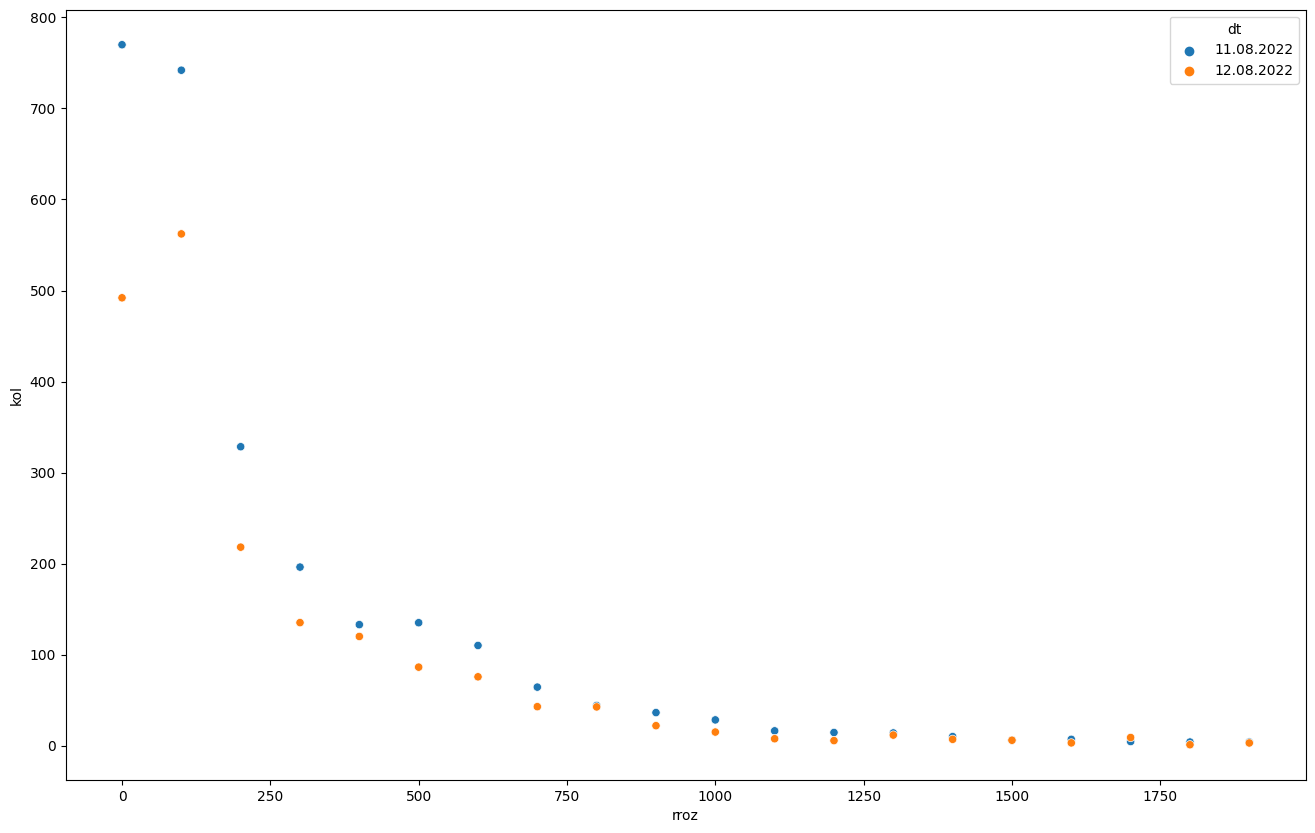

In [49]:
sns.scatterplot(x=a['rroz'], y=a['kol'], hue=a.dt)

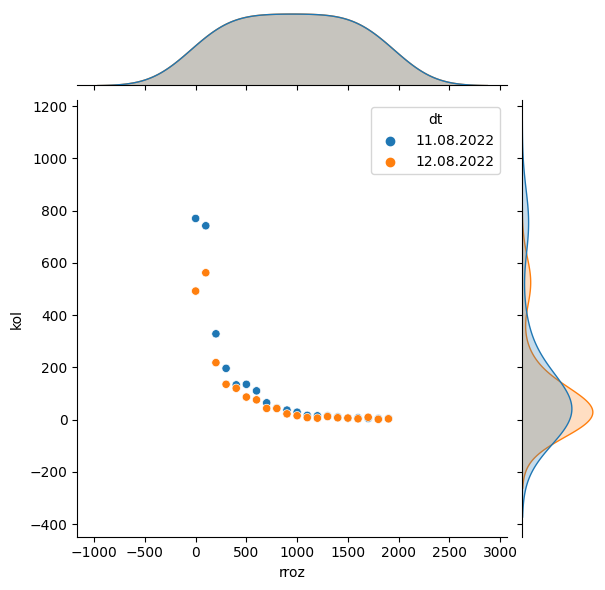

In [48]:
sns.jointplot(x=a['rroz'], y=a['kol'], hue=a.dt)

In [51]:
b = df.groupby(['dt', 'apt', 'empl', 'pay_type'])['kol'].agg(sum).reset_index()
b

,dt,apt,empl,pay_type,kol
0,11.08.2022,2,123,15,151.05
1,11.08.2022,2,123,18,164.13
2,11.08.2022,2,205,15,65.11
3,11.08.2022,2,205,18,66.00
4,11.08.2022,6,25,15,95.00
5,11.08.2022,6,25,18,142.53
6,11.08.2022,7,605,15,67.04
7,11.08.2022,7,605,18,101.85
8,11.08.2022,11,30,15,179.00
9,11.08.2022,11,30,18,310.48


In [52]:
b.pivot_table(values='kol', index=['dt', 'apt', 'empl'], columns=['pay_type'])

pay_type                15     18
dt         apt empl              
11.08.2022 2   123  151.05 164.13
               205   65.11  66.00
           6   25    95.00 142.53
           7   605   67.04 101.85
           11  30   179.00 310.48
           13  50   180.40 151.78
           15  53    51.98 142.10
           17  36    54.73 186.94
           18  47    89.04 236.24
               54    65.10 198.77
12.08.2022 2   123  210.50 152.72
               205   88.41  80.19
           6   37    72.92 207.89
           11  110   91.67 363.08
           18  48   134.79 222.65
               54    64.10 197.65

In [53]:
c = df.pivot_table(values='roz', index=['dt', 'apt', 'empl'], columns=['pay_type'], aggfunc=sum)
c = c.reset_index()
pd.melt(c, id_vars=['dt', 'apt', 'empl'], value_vars=[15, 18], var_name='p_type')

,dt,apt,empl,p_type,value
0,11.08.2022,2,123,15,55981.01
1,11.08.2022,2,205,15,27403.00
2,11.08.2022,6,25,15,27402.00
3,11.08.2022,7,605,15,17618.00
4,11.08.2022,11,30,15,38692.32
5,11.08.2022,13,50,15,44746.00
6,11.08.2022,15,53,15,20155.00
7,11.08.2022,17,36,15,20890.00
8,11.08.2022,18,47,15,25685.01
9,11.08.2022,18,54,15,12118.00


In [56]:
df[(df['kol'] > 5) | (df['roz'] > 2000)]

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,rroz
27,11.08.2022,11:50:16,2184,2004598,2,153467,1.00,2545.84,2824.00,141.00,15,153467,ВИТТА КОМПАНИ ООО,9,200010014079,205,обычный,1.00,2800.00
29,11.08.2022,11:50:16,2184,2004598,2,154600,1.00,3076.03,3432.00,171.00,15,154600,Протек,9,200010014079,205,обычный,5.00,3400.00
45,11.08.2022,13:10:54,2192,2004598,2,455413,1.00,11851.13,12345.00,0.00,18,455413,Протек,nan,nan,205,интернет,1.00,12300.00
62,11.08.2022,14:47:12,2201,2004598,2,296849,1.00,2669.94,2945.00,147.00,15,296849,Катрен г.Химки,9,200010024690,205,обычный,1.00,2900.00
65,11.08.2022,14:52:33,2203,2004598,2,254247,1.00,1559.37,2106.00,147.00,15,254247,Здравсервис,9,200010018590,205,обычный,1.00,2100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,12.08.2022,16:33:37,4368,18002543,18,151718,1.00,1848.83,2275.00,0.00,18,151718,Фармкомплект ООО,nan,nan,54,обычный,1.00,2300.00
3983,12.08.2022,17:02:34,4375,18002543,18,168640,1.00,1944.66,2529.00,0.00,18,168640,Здравсервис,nan,nan,54,обычный,3.00,2500.00
4057,12.08.2022,19:29:31,4422,18002543,18,1131,1.00,3778.85,4422.00,0.00,18,1131,Авеста,nan,nan,54,обычный,3.00,4400.00
4058,12.08.2022,19:29:31,4422,18002543,18,353730,1.00,8706.40,10187.00,0.00,18,353730,ГК Надежда Фарм,nan,nan,54,обычный,1.00,10200.00


In [57]:
df[~df.loc[:, 'pay_type'].isin([15, 20])]

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,rroz
0,11.08.2022,10:15:35,2173,2004598,2,45399,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,обычный,1.00,100.00
4,11.08.2022,10:33:56,2175,2004598,2,79056,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,обычный,1.00,800.00
5,11.08.2022,10:40:38,2176,2004598,2,187304,1.00,152.90,182.00,9.00,18,187304,Пульс,9,200010001947,205,обычный,1.00,200.00
6,11.08.2022,10:40:38,2176,2004598,2,1261,1.00,67.94,85.00,4.00,18,1261,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,9,200010001947,205,обычный,2.00,100.00
7,11.08.2022,10:52:52,2177,2004598,2,2566,1.00,157.76,189.00,9.00,18,2566,Катрен г.Химки,9,200010013331,205,обычный,3.00,200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,12.08.2022,21:39:23,5689,18002542,18,28488,1.00,62.34,97.00,0.00,18,28488,Здравсервис,nan,nan,48,обычный,1.00,100.00
4457,12.08.2022,21:40:17,5690,18002542,18,463100,1.00,47.88,75.00,0.00,18,463100,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,nan,nan,48,обычный,1.00,100.00
4458,12.08.2022,21:40:59,5691,18002542,18,112158,1.00,59.51,93.00,0.00,18,112158,Протек,nan,nan,48,обычный,1.00,100.00
4459,12.08.2022,21:43:48,5692,18002542,18,260990,1.00,297.74,396.00,0.00,18,260990,Авеста,nan,nan,48,обычный,1.00,400.00


In [58]:
d ={
    'Обычный': 'Simple',
    'Интернет': 'Web'
}



0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4457    NaN
4458    NaN
4459    NaN
4460    NaN
4461    NaN
Name: vzak, Length: 4462, dtype: object

In [60]:
df['vzak'].map(d)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4457    NaN
4458    NaN
4459    NaN
4460    NaN
4461    NaN
Name: vzak, Length: 4462, dtype: object